<b style="color:blue;font-size:20px">Analysis of factors influencing PM 2.5 level other than the Demographics of the city.</b><br></br>
<b>The analysis is performed on the beijing data to understand how meteorological factors such as Temperature, Pressure, Dewpoint etc. influence PM2.5 level</b>

In [1]:
import time 
timedict={}

In [2]:
s_time= time.time()

#import all the necessary packages that would be used across the project, to perform various operations.
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as matplotlib
import matplotlib.pylab as plt
#Using other libraries
from sklearn.cluster import KMeans
import timeit
%matplotlib inline

e_time = time.time()

print(e_time-s_time)
timedict["importLibs"]=e_time-s_time

1.345703125


<b>Download the data from the link provided below, the file will be downloded in your downloads folder.</b>

<a>https://drive.google.com/file/d/1kub1IbC8vO6iWAfo7ceJW2tWyQ-o2oud/view?usp=sharing</a>

<b>Place the downloaded file from the download folder to your current working directory. To know what is the current working directory of the note book, please run the following code below</b>

In [3]:
import os
print(os.getcwd())

/Users/FrankLIUChangxuan/Desktop


<b>C:\Users\KVR\Documents\Python Scripts\Class examples\Project_Files</b> This represent My <b style="color:red">working directory</b>, Please run the above code to get yours.

<b style="color:blue;font-size:20px">Intial analysis on data to understand data.</b>

<p>Read the intial data, which is in csv format into the dataframe using pandas (pd)</p>

In [4]:
s_time= time.time()

Beijingdata = pd.read_csv("BeijingPM20100101_20151231.csv")
print(Beijingdata.head())

e_time = time.time()

print(e_time-s_time)
timedict["readData"]=e_time-s_time

   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0  
0.199204

<b>Description of the dataset</b>
<ul>
<li><b style="color:red">year</b>year of data in this row </li>
<li><b style="color:red">month</b> : month of data in this row</li>
<li><b style="color:red">day</b> : day of data in this row</li>
<li><b style="color:red">hour</b> :  hour of data in this row</li>
<li><b style="color:red">season</b> : season of data in this row</li>
<li><b style="color:red">PM</b> : PM2.5 concentration (ug/m^3)</li>
<li><b style="color:red">DEWP</b> : Dew Point (Celsius Degree) </li>
<li><b style="color:red">TEMP</b> : Temperature (Celsius Degree)  </li>
<li><b style="color:red">HUMI</b> : Humidity (%)</li>
<li><b style="color:red">PRES</b> : Pressure (hPa)</li>
<li><b style="color:red">cbwd</b> : Combined wind direction  </li>
<li><b style="color:red">Iws</b> : Cumulated wind speed (m/s) </li>
<li><b style="color:red">precipitation</b> : hourly precipitation (mm)  </li>
<li><b style="color:red">Iprec</b> : Cumulated precipitation (mm)  </li>
    
    
    
</ul>

<b style="color:blue;font-size:20px">Data cleansing and preparing data for analysis</b>
<ul>
<li><p>Missingno is a package, which helps to visualize how good our data quality is, the package represents the null values
across each column with white spaces, which helps us to visualize how good the data is.
</p><br></br></li>
<li><div>To install this package, please open the anaconda command prompt and enter the following comand.</div><br></br></li>
<ul>
<li><b style="color:red">conda install -c conda-forge missingno</b></li>
</ul>
</ul>

0.4313530921936035


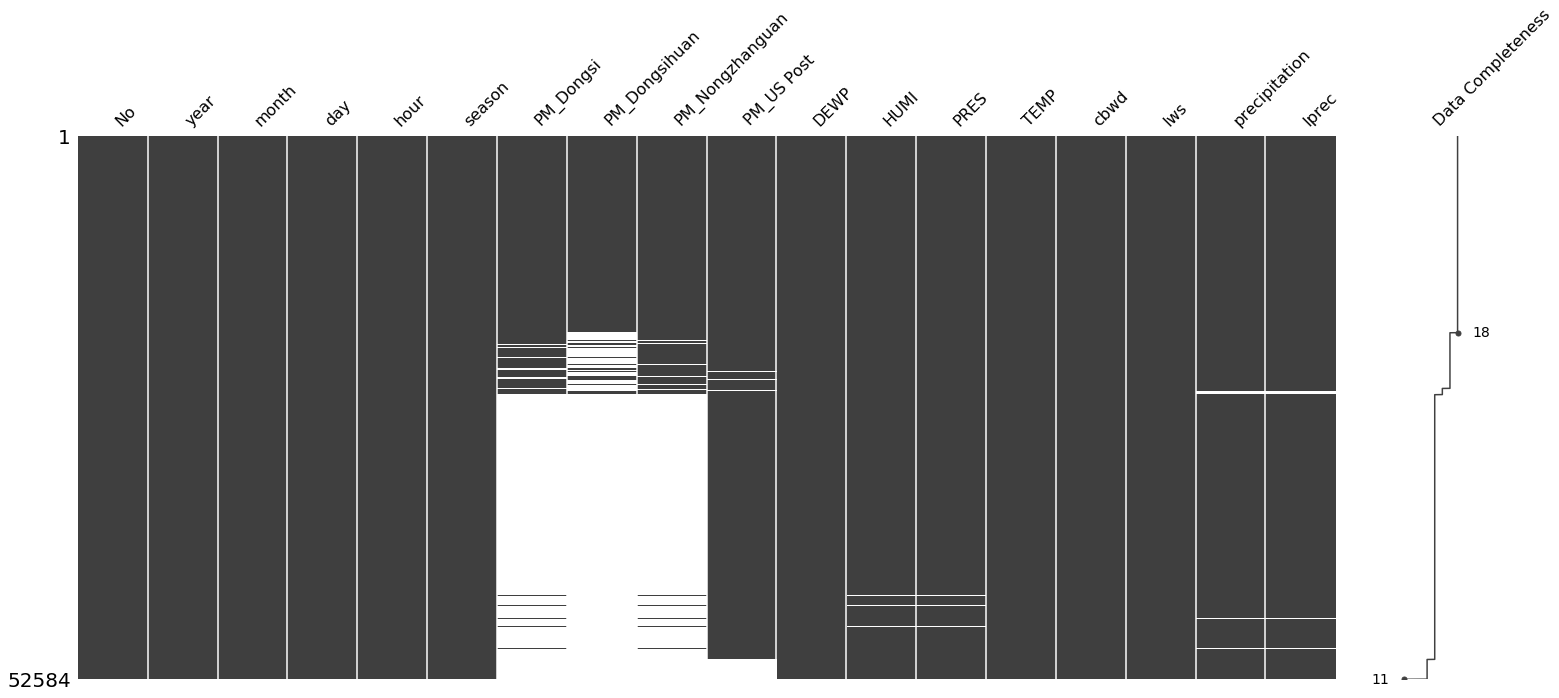

In [5]:
s_time = time.time()

#check the data quality
import missingno as msno
msno.matrix(Beijingdata, labels=True, sort='descending')
#Data shows lot of discrepancies, there are too many whitespaces, which show we have a lot of NAN values

e_time = time.time()

print(e_time-s_time)
timedict["CheckNA"]=e_time-s_time

<b>The white spaces in the graph above depict all the NULL values with respect to each column in our intia dataset.</b>
<p>Remove all the <b style = "color:red">NAN</b> values in the data, so that the analysis that we perform would be precise and yeild better results.</p>

In [6]:
s_time = time.time()

for i in Beijingdata.columns:
 Beijingdata = Beijingdata.dropna(subset=[i]) # remove Nan's from all columns

e_time = time.time()

print(e_time-s_time)
timedict["RemoveNA"]=e_time-s_time

0.11868000030517578


<p>Check for the data quality after removing all the rows with <b style="color:red">NAN</b>, Data quality looks <b style="color:blue">strong.</b></p>

0.13552093505859375


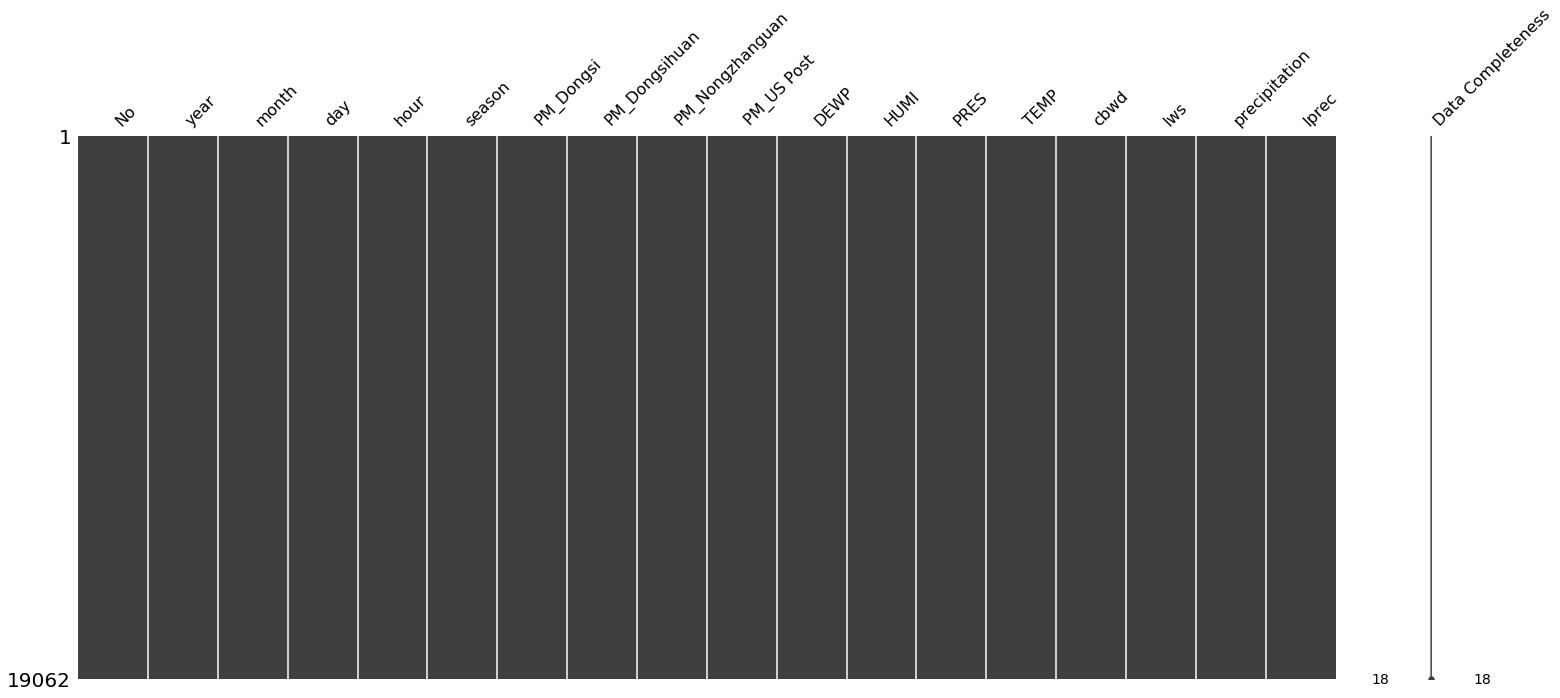

In [7]:
s_time = time.time()

#check the data quality
import missingno as msno
msno.matrix(Beijingdata, labels=True, sort='descending')
#Data shows lot of discrepancies

e_time = time.time()

print(e_time-s_time)
timedict["AgainCheckNA"]=e_time-s_time

<b style="color:orange;font-size:15px">The data quality looks comeplete. We can go ahead and start preparing the data for analysis</b>

<ul><li><p>Data has, <b style="color:red">year, month and hour</b> columns. Merging these three columns, to make them into a <b style="color:red">datatime</b> object would be helpful for our analysis.</b></li>
<li><p>Below steps depict the code that adds datatimeobject to the dataframe</p></li>
<li><b style="color:red">"Merged_Date_Time"</b> columns is succesfully added after executing the below step.</li></ul>

In [8]:
s_time = time.time()

#To append Time, Date and hours and make a date and time object 
import datetime
def getFullDate(row):
    time = str(row['month'])+"/"+ str(row["day"])+"/"+str(row["year"])
    date = datetime.datetime.strptime(time, "%m/%d/%Y")
    time = str(row["hour"]).split(":")
    date = date.replace(hour=int(time[0]))
    return date
Beijingdata["Merged_Date_Time"] = Beijingdata.apply(getFullDate, axis=1) #.apply() function applies function along input axis of DataFrame.
print(Beijingdata.head())#check if the "Merged_Date_Time" column has been appended to the dataframe.

e_time = time.time()

print(e_time-s_time)
timedict["Merge"]=e_time-s_time

          No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
27824  27825  2013      3    5     8       1      117.0          166.0   
27825  27826  2013      3    5     9       1      131.0          165.0   
27826  27827  2013      3    5    10       1      141.0          173.0   
27828  27829  2013      3    5    12       1      169.0          182.0   
27829  27830  2013      3    5    13       1      169.0          169.0   

       PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd   Iws  \
27824            140.0       150.0  -6.0  59.0  1019.0   1.0   cv  0.89   
27825            152.0       163.0  -8.0  38.0  1019.0   5.0   cv  1.78   
27826            128.0       172.0  -8.0  31.0  1018.0   8.0   cv  2.67   
27828              3.0       181.0  -9.0  23.0  1017.0  11.0   cv  4.45   
27829              3.0       187.0  -9.0  22.0  1015.0  12.0   cv  5.34   

       precipitation  Iprec    Merged_Date_Time  
27824            0.0    0.0 2013-03-05 08:00:00  
2782

<p>The dataset has PM2.5 level from various loactions in beijing</p>
<ul><li>PM_Dongsi</li><li>PM_Dongsihuan</li><li>PM_Nongzhanguan</li><li>PM_US Post</li></ul>
<p>To perform the analysis on PM2.5 we take the the average of PM 2.5 across all the locations into column <b style="color:red">"Average_PM_Level"</b>, to depict the PM level of beijing in total.</p>

In [9]:
s_time = time.time()

def getAverageColumn(row):
    avg = (int(row["PM_Dongsi"]) + int(row["PM_Dongsihuan"]) + int(row["PM_Nongzhanguan"]) + int(row["PM_US Post"]))/4
    return avg
Beijingdata["Average_PM_Level"] = Beijingdata.apply(getAverageColumn, axis=1)
print(Beijingdata.head()) # Check if the column is added into the dataframe.

e_time = time.time()

print(e_time-s_time)
timedict["GetDepVar"]=e_time-s_time

          No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
27824  27825  2013      3    5     8       1      117.0          166.0   
27825  27826  2013      3    5     9       1      131.0          165.0   
27826  27827  2013      3    5    10       1      141.0          173.0   
27828  27829  2013      3    5    12       1      169.0          182.0   
27829  27830  2013      3    5    13       1      169.0          169.0   

       PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd   Iws  \
27824            140.0       150.0  -6.0  59.0  1019.0   1.0   cv  0.89   
27825            152.0       163.0  -8.0  38.0  1019.0   5.0   cv  1.78   
27826            128.0       172.0  -8.0  31.0  1018.0   8.0   cv  2.67   
27828              3.0       181.0  -9.0  23.0  1017.0  11.0   cv  4.45   
27829              3.0       187.0  -9.0  22.0  1015.0  12.0   cv  5.34   

       precipitation  Iprec    Merged_Date_Time  Average_PM_Level  
27824            0.0    0.0 2013-03-

<b style="color:blue;font-size:20px">Explanatory analysis</p>

<b>Run the scatter plot on all the variables to understand, the relation ship between each and every variable.</b>

In [10]:
#Desctiptive Statistics
Beijingdata[["Average_PM_Level","DEWP","HUMI","TEMP","cbwd","Iws","Iprec","Merged_Date_Time"]].describe()

Average_PM_Level          DEWP          HUMI          TEMP  \
count       19062.00000  19062.000000  19062.000000  19062.000000   
mean           88.66264      2.361924     51.362344     14.062900   
std            83.53013     14.266730     25.520666     11.527468   
min             3.00000    -40.000000      2.000000    -12.000000   
25%            26.75000    -10.000000     29.000000      4.000000   
50%            65.50000      3.000000     52.000000     15.000000   
75%           121.25000     16.000000     73.000000     24.000000   
max           684.75000     26.000000    100.000000     40.000000   

                Iws         Iprec  
count  19062.000000  19062.000000  
mean      21.019979      0.215764  
std       46.390482      2.149536  
min        0.450000      0.000000  
25%        1.790000      0.000000  
50%        4.920000      0.000000  
75%       19.670000      0.000000  
max      490.380000     51.100000

4.4547810554504395


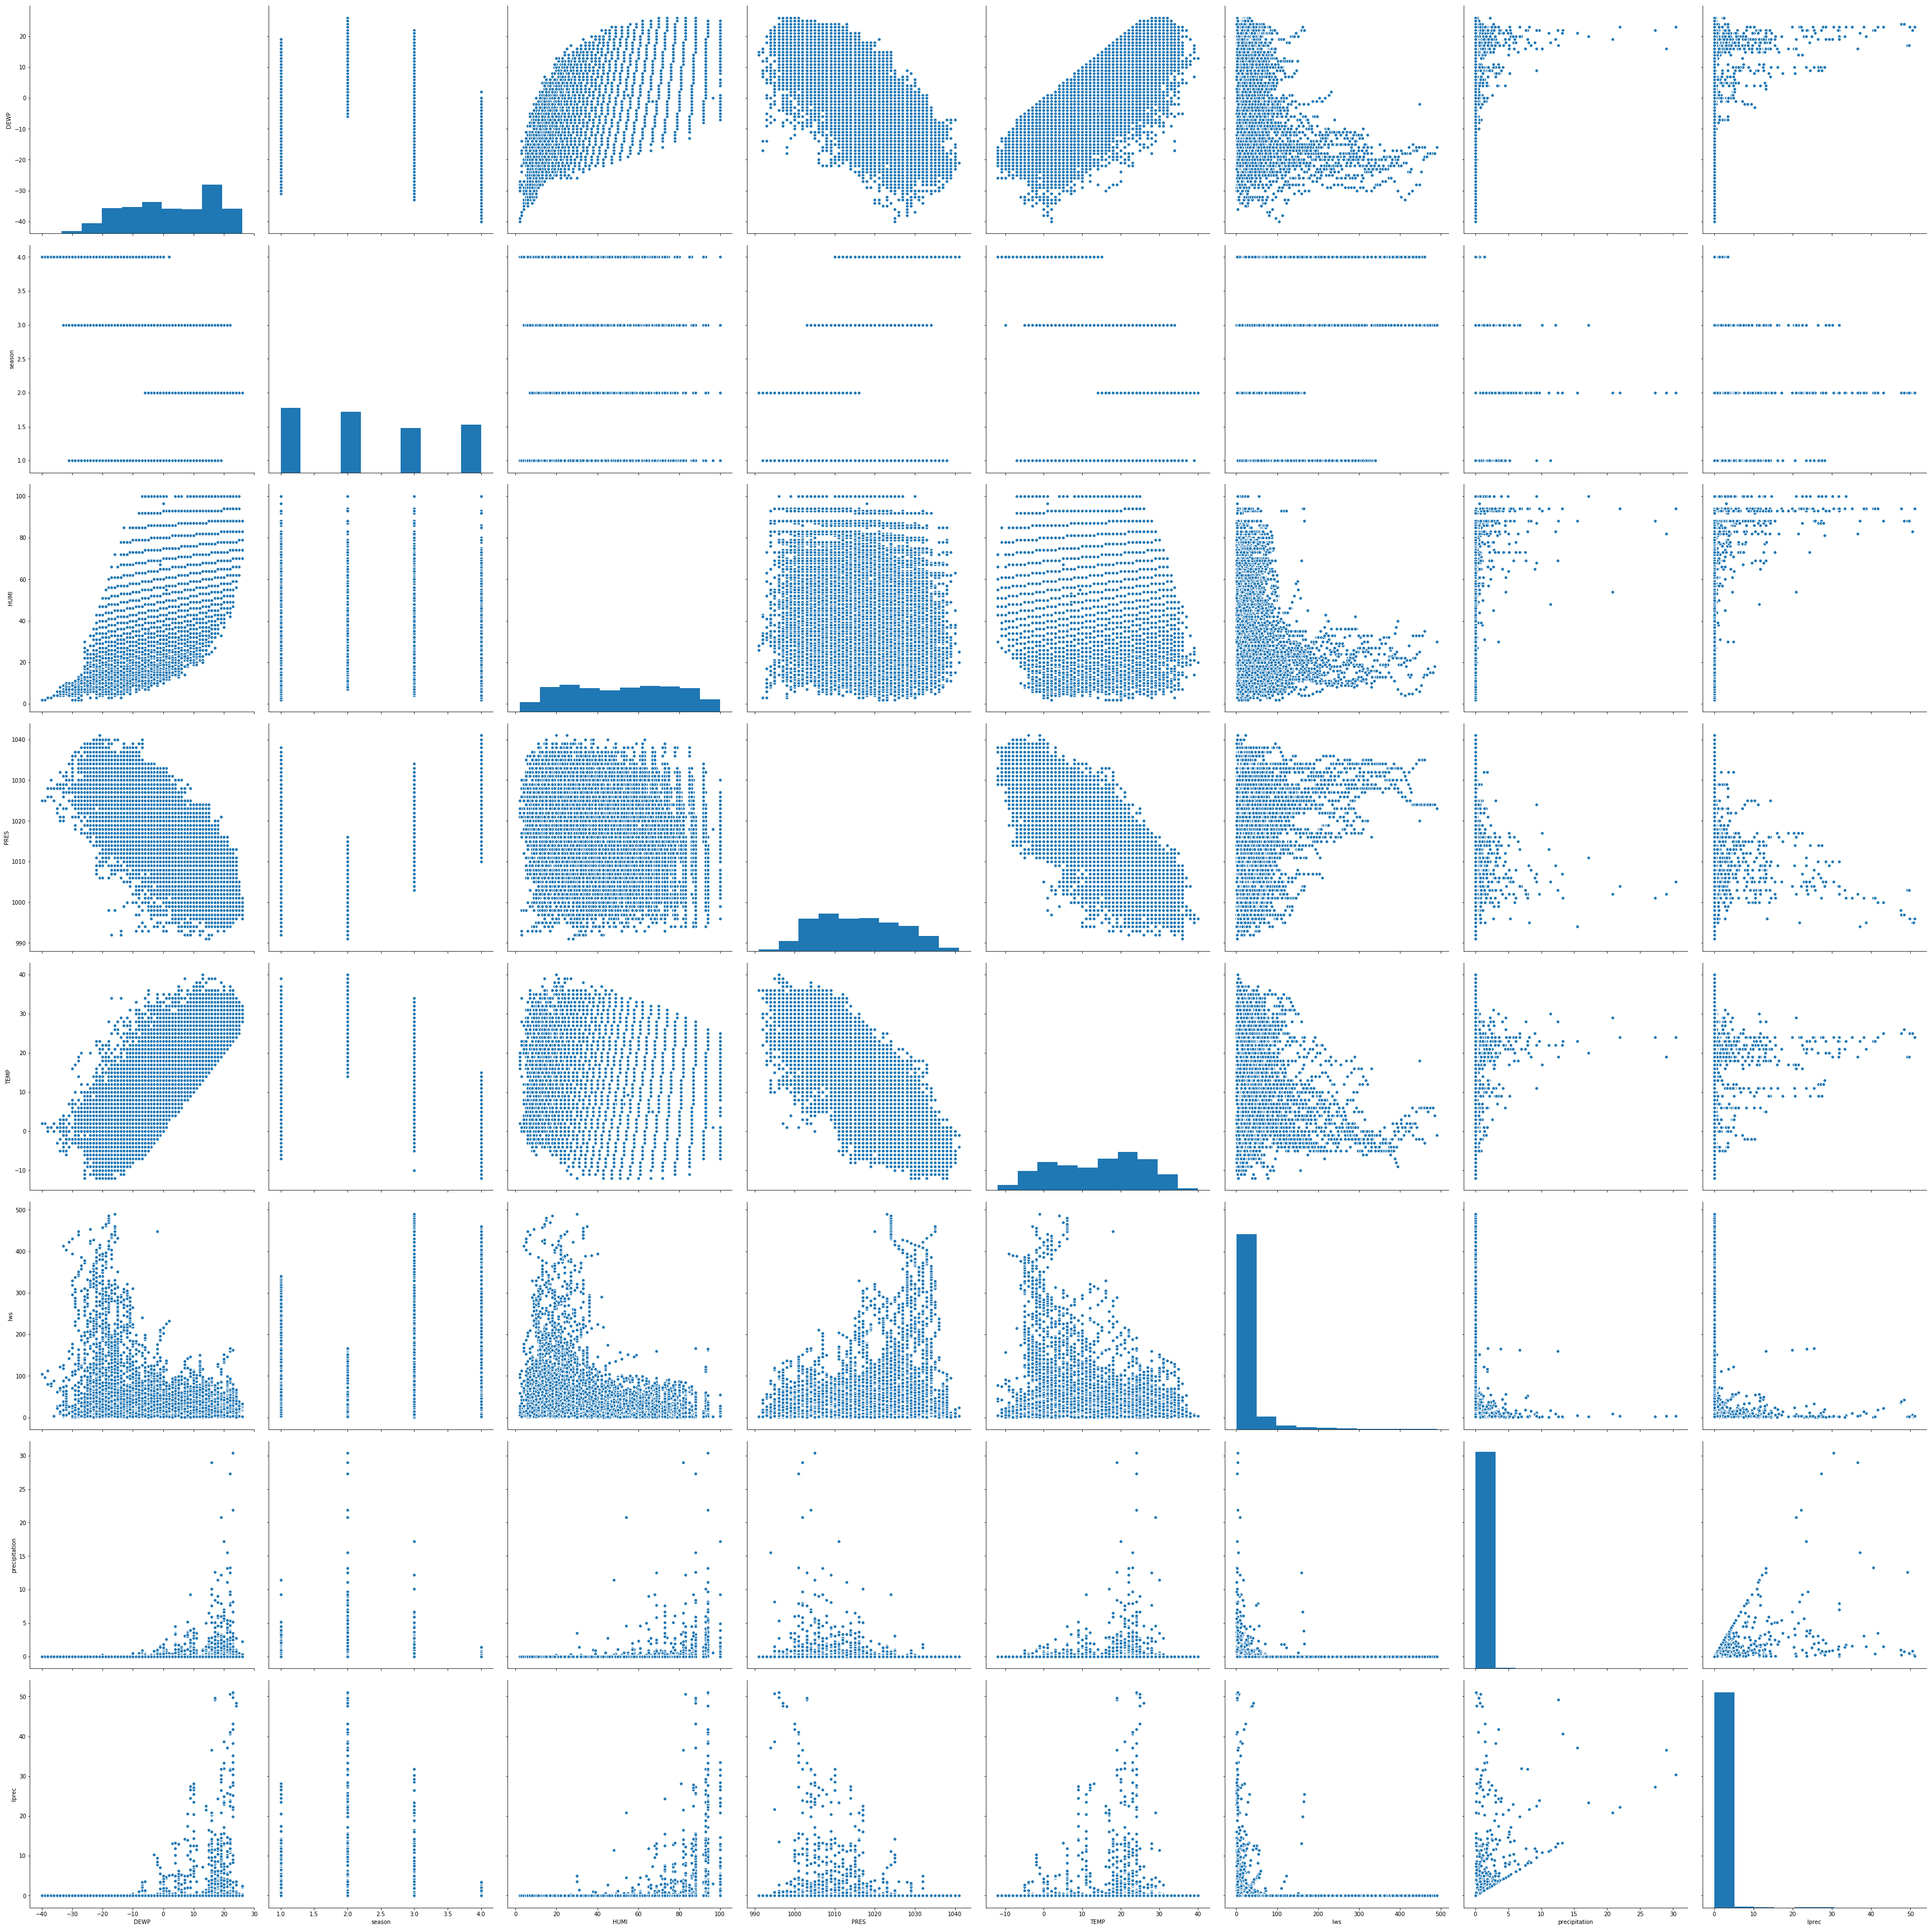

In [11]:
s_time = time.time()

#Data looks consistent, let's run the pair plot to see the patterns
sns.pairplot(x_vars=['DEWP','season','HUMI','PRES','TEMP','Iws','precipitation','Iprec'], y_vars=['DEWP','season','HUMI','PRES','TEMP','Iws','precipitation','Iprec'], data=Beijingdata, size=6)

e_time = time.time()

print(e_time-s_time)
timedict["Pairplot#1"]=e_time-s_time

<b style="color:orange;font-size:10">There appears to be some kind of relation between some variables, let's Get a correlation matrix on all the variables to check the relation between variables
</b>

In [12]:
s_time = time.time()

print(Beijingdata.corr()) # To find the correlation matrix between all the variables

e_time = time.time()

print(e_time-s_time)
timedict["GetCorr"]=e_time-s_time

                        No      year     month       day      hour    season  \
No                1.000000  0.931279  0.044451  0.019538  0.000489  0.144295   
year              0.931279  1.000000 -0.321200 -0.015120 -0.000749  0.030228   
month             0.044451 -0.321200  1.000000  0.006562  0.000887  0.288563   
day               0.019538 -0.015120  0.006562  1.000000 -0.004411 -0.008862   
hour              0.000489 -0.000749  0.000887 -0.004411  1.000000 -0.003047   
season            0.144295  0.030228  0.288563 -0.008862 -0.003047  1.000000   
PM_Dongsi        -0.021616  0.006845 -0.081342  0.062343  0.013020  0.093606   
PM_Dongsihuan    -0.013390  0.000714 -0.042598  0.058939 -0.027725  0.110676   
PM_Nongzhanguan  -0.010063  0.007963 -0.054522  0.063964 -0.009939  0.129988   
PM_US Post       -0.048438 -0.026898 -0.058819  0.064723 -0.007406  0.130447   
DEWP              0.016269 -0.048169  0.174968  0.032852 -0.031822 -0.387904   
HUMI              0.048811 -0.009947  0.

<b style="color:orange;font-size:10">Key take aways</b>
<ul>
<li><b>Temperature has <b style="color:red">negative</b> relation with PM level </b></li>
<li><b>Temperature has <b style="color:red">positive</b> relation with Dew point </b></li>
<li><b>Temperature has <b style="color:red">negative</b> relation with Pressure </b></li>
<li><b>Humidity has <b style="color:red">positive</b> relation with PM level </b></li>
<li><b>Humidity has <b style="color:red">negative</b> relation with IWS(Wind speed)</b></li>
<li><b>Pressure has <b style="color:red">negative</b> relation with Dew point </b></li>


</ul>

<b style="color:orange;font-size:10">Find trends and relation between different variables and PM_level</b>

<p> Trend/ relation between <b style="color:red">hour</b> and <b style="color:red">PM Level</b></p>

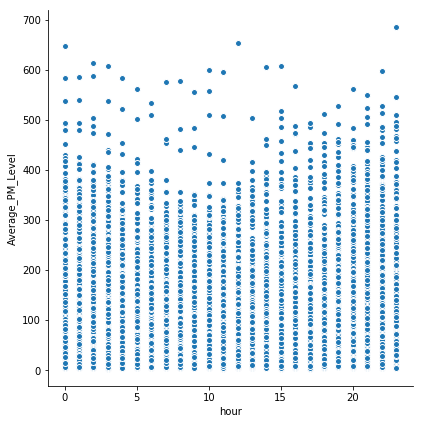

In [13]:
#Shows that PM Level is high in winters than summers. This pattern is intact with the fact
sns.pairplot(x_vars=['hour'], y_vars=['Average_PM_Level'], data=Beijingdata, size=6)


In [14]:
x =  Beijingdata.loc[(Beijingdata['month'] == 3) &Beijingdata['day'].isin([5])& Beijingdata['year'].isin([2015])]
print(x[['Average_PM_Level','hour']])

       Average_PM_Level  hour
45336             94.00     0
45337            106.25     1
45338            120.00     2
45339            134.00     3
45340            129.25     4
45341            120.25     5
45342            133.00     6
45343            135.75     7
45344            145.00     8
45345            158.00     9
45346            172.00    10
45347            109.25    11
45348             98.50    12
45349             74.00    13
45350             67.75    14
45351             72.00    15
45352             75.75    16
45353             78.75    17
45354             80.00    18
45355            104.00    19
45356            158.75    20
45357            187.00    21
45358            176.75    22
45359            145.50    23


<b>Numerical analysis depicts that there is some kind of pattern between <b style="color:red">hour of the day</b> and <b style="color:red">PM Level</b></b>
<ul><li>It <b style="color:red">increases</b> from 0 to 11 and <b style="color:red">decreases</b> from 11 to 18 and then <b style="color:red">increases</b> from 18 to 23 </li></ul>

<b>Let's check of the trend is <b style="color:red">prevalent</b> across the other days too.</b>

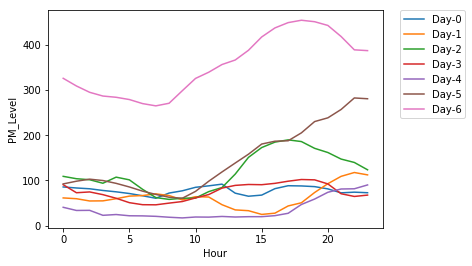

In [15]:
#Plot the graph of PM_Level on hour for 7 days and check if the trend prevails
ListofallDays = []
for i in range(1,30):
    HourPmdatabyHour = []   
    x =  Beijingdata.loc[(Beijingdata['month'] == 10) &Beijingdata['day'].isin([i])& Beijingdata['year'].isin([2014])]
    PM_Level = x.Average_PM_Level
    if(len(x.hour) == 24):
     ListofallDays.append(PM_Level)
    
Days = range(0,24)
fig = plt.figure()
#times = Functionofsimulation(100,10000,100)
ax1 = fig.add_subplot(111)
for d in range(0,(len(ListofallDays) - 1)):
 ax1.plot(Days,ListofallDays[d], '-',label="Day-"+ str(d))
plt.xlabel('Hour')
plt.ylabel('PM_Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<b>The trend of <b style="color:red">high, low, high</b> looks prevalent across all the other days too.</b>

<p> Trend/ relation between <b style="color:red">Month</b> and <b style="color:red">PM Level</b></p>

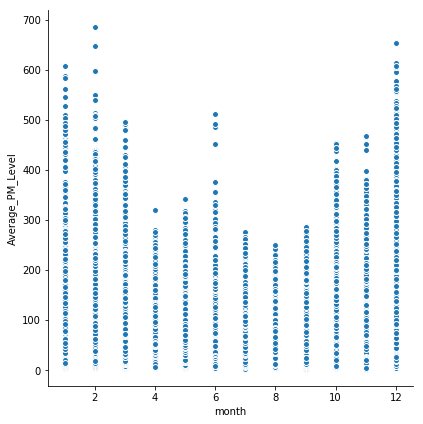

In [16]:
#Shows that PM Level is high in winters than summers. This pattern is intact with the fact
sns.pairplot(x_vars=['month'], y_vars=['Average_PM_Level'], data=Beijingdata, size=6)


<p> Trend/ relation between <b style="color:red">Hour</b> and <b style="color:red">Windspeed</b></p>

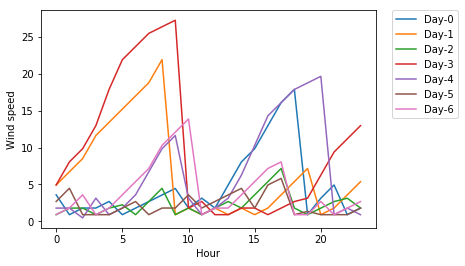

In [17]:
#Plot the graph of PM_Level on hour for 7 days and check if the trend prevails
ListofallDays = []
for i in range(1,30):
    HourPmdatabyHour = []   
    x =  Beijingdata.loc[(Beijingdata['month'] == 10) &Beijingdata['day'].isin([i])& Beijingdata['year'].isin([2014])]
    PM_Level = x.Iws
    if(len(x.hour) == 24):#account only when the day has entries for all the 24 hours
     ListofallDays.append(PM_Level)
    
Days = range(0,24)
fig = plt.figure()
ax1 = fig.add_subplot(111)
for d in range(0,(len(ListofallDays) - 1)):
 ax1.plot(Days,ListofallDays[d], '-',label="Day-"+ str(d))
plt.xlabel('Hour')
plt.ylabel('Wind speed')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<b>The trend of <b style="color:red">high, low, high</b> looks prevalent across all the other days too.</b>

<b>The trend of <b style="color:red">Wind speed</b> and <b style="color:red">PM-2.5</b></b>

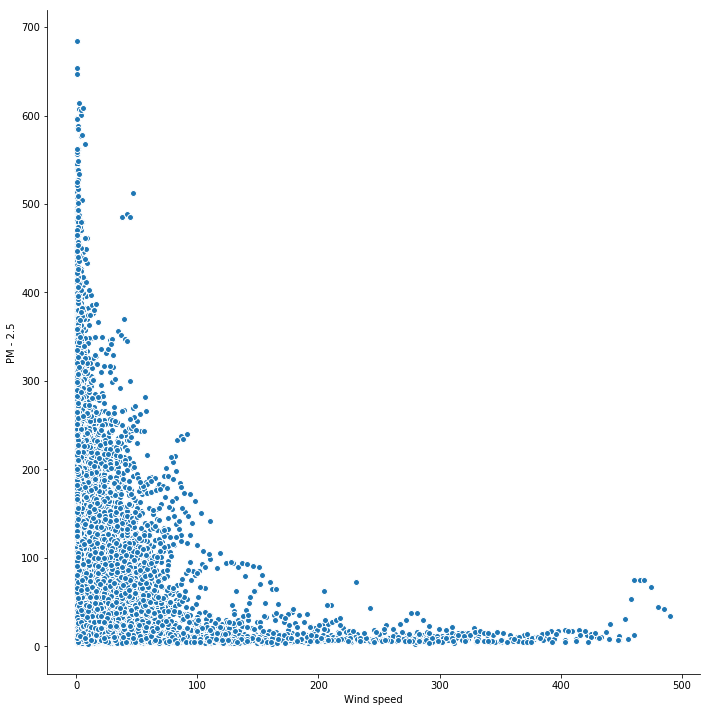

<Figure size 1332x756 with 0 Axes>

In [18]:
sns.pairplot(x_vars=['Iws'], y_vars=['Average_PM_Level'], data=Beijingdata, size=10)
plt.xlabel('Wind speed')
plt.ylabel('PM - 2.5')
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.show()

<b>As the Windspeed <b style="color:red">Increases</b> PM2.5 level <b style="color:red">decreases</b>.</b>

<b>The trend of <b style="color:red">Temperature</b> and <b style="color:red">PM-2.5</b></b>

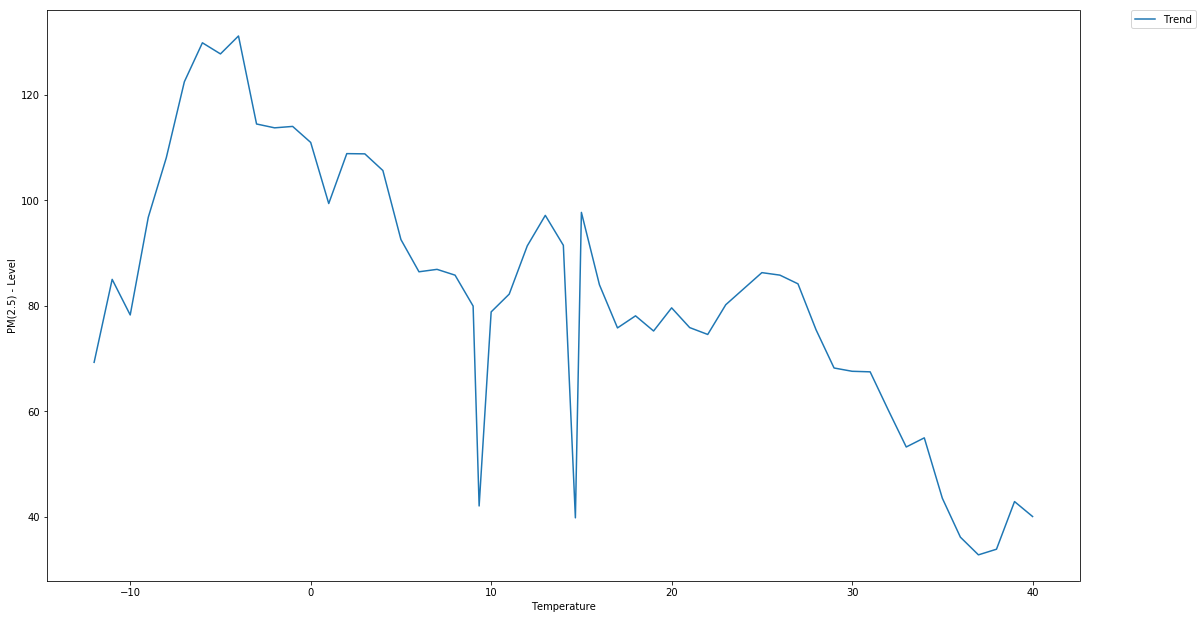

In [19]:
#For the whole data this is how the graph is for all the hours
listofmodesbyhour = []
listofmeansbyTemperature = []
uniquelist =np.array(Beijingdata.TEMP.unique()).tolist()
uniquelist.sort();
for i in range(0,len(uniquelist)):
    
    x = Beijingdata[Beijingdata.TEMP == uniquelist[i]]
    listofmeansbyTemperature.append(x.Average_PM_Level.mean())

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
#times = Functionofsimulation(100,10000,100)
ax1 = fig.add_subplot(111)
ax1.plot(uniquelist,listofmeansbyTemperature, '-',label="Trend")
plt.xlabel('Temperature')
plt.ylabel('PM(2.5) - Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()



<b>As the Temperature <b style="color:red">Increases</b> PM2.5 level <b style="color:red">decreases</b>.</b>

<b>The trend of <b style="color:red">Temperature</b> and <b style="color:red">Hour</b></b>

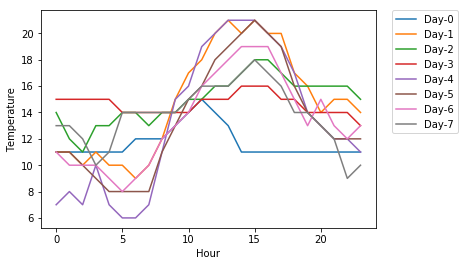

In [20]:
#For the whole data this is how the graph is for all the hours
ListofallDays = []
for i in range(1,30):
    HourPmdatabyHour = []
   
    x =  Beijingdata.loc[(Beijingdata['month'] == 10) &Beijingdata['day'].isin([i])& Beijingdata['year'].isin([2014])]
    HourPmdatabyHour = x.TEMP
    if(len(x.hour) == 24):
     ListofallDays.append(HourPmdatabyHour)
    
Days = range(0,24)
fig = plt.figure()
ax1 = fig.add_subplot(111)
for d in range(0,len(ListofallDays)):
 ax1.plot(Days,ListofallDays[d], '-',label="Day-"+ str(d))
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<b>The trend of <b style="color:red">high, low, high</b> looks prevalent across all the other days too.</b>

<b>The trend of <b style="color:red">Year</b> and <b style="color:red">PM2.5 Level</b></b>

In [21]:
Df = Beijingdata

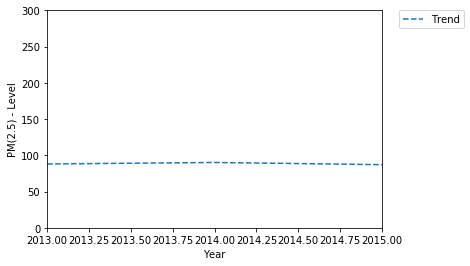

In [22]:
#For the whole data this is how the graph is for all the hours
listofmeansbyyear = []
for i in Beijingdata.year.unique():
    x = Df[Df.year == i]
    listofmeansbyyear.append(x.Average_PM_Level.mean())

Years = []
for i in Beijingdata.year.unique():
    Years.append(i)
fig = plt.figure()
#times = Functionofsimulation(100,10000,100)
ax1 = fig.add_subplot(111)
ax1.plot(Years,listofmeansbyyear, '--',label="Trend")
plt.xlabel('Year')
plt.ylabel('PM(2.5) - Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0, 300)
plt.xlim(2013, 2015)
plt.show()



<b>PM level remained <b style="color:red">constant</b> for all the years, we considered in the data.</b>

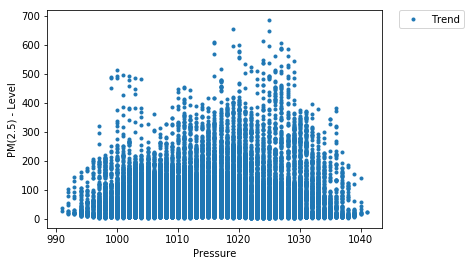

In [23]:
#For the whole data this is how the graph is for all the hours
fig = plt.figure()
#times = Functionofsimulation(100,10000,100)
ax1 = fig.add_subplot(111)
ax1.plot(Beijingdata.PRES,Beijingdata.Average_PM_Level, '.',label="Trend")
plt.xlabel('Pressure')
plt.ylabel('PM(2.5) - Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [24]:
s_time = time.time()

DLIST = np.array(Beijingdata.cbwd).tolist()
newlist = []
for i in range(0,len(Beijingdata)):
    if((str(DLIST[i]) == "NW") | (str(DLIST[i]) == "NE")):
       newlist.append("North")
    elif((str(DLIST[i]) == "cv") | (str(DLIST[i]) == "SE")):
       newlist.append("South")

DataframeTest = pd.DataFrame(
    {'Pressure': Beijingdata.PRES,
     'PM-2.5 - level': Beijingdata.Average_PM_Level,
     'Type':newlist
    })

e_time = time.time()

print(e_time-s_time)
timedict["GetWD"]=e_time-s_time

0.02056884765625


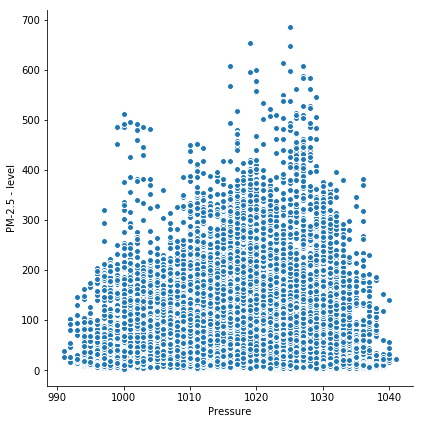

In [25]:
#Data looks consistent, let's run the pair plot to see the patterns
sns.pairplot(x_vars=['Pressure'], y_vars=['PM-2.5 - level'], data=DataframeTest, size=6)

<b style="color:orange;font-size:10">Key take aways</b>
<ul>
<li><b>Hour of the day exhibits <b style="color:red">High, Low, High</b> relation with PM2.5 level </b></li>
<li><b>Month of the year exhibits <b style="color:red">High, Low, High</b> relation with PM2.5 Level </b></li>
<li><b>Hour exhibits <b style="color:red">High, Low, High</b> relation with PM2.5 Level </b></li>
<li><b>Windspeed exhibits <b style="color:red">negative</b> relation with PM2.5 level </b></li>
<li><b>Temperature exhibits <b style="color:red">negative</b> relation with PM2.5 level</b></li>
<li><b>Temperature exhibits <b style="color:red">High, Low, High</b> relation with PM2.5 level</b></li>


</ul>

<b style="color:blue;font-size:20px">Regression Analysis on PM2.5</b>

<b style="color:orange;font-size:10">Regression on full model, without accounting for the patterns in the data.</b>

In [26]:
s_time = time.time()

import statsmodels.formula.api as sm
result = sm.ols(formula="Average_PM_Level ~ TEMP+DEWP+PRES+HUMI+Iws+Iprec+precipitation", data=Beijingdata).fit()
print (result.summary())

e_time = time.time()

print(e_time-s_time)
timedict["Reg1"]=e_time-s_time

                            OLS Regression Results                            
Dep. Variable:       Average_PM_Level   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     814.6
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:03:52   Log-Likelihood:            -1.0891e+05
No. Observations:               19062   AIC:                         2.178e+05
Df Residuals:                   19054   BIC:                         2.179e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       835.5029    100.543      8.310

<b style="color:orange;font-size:10>">Checking the VIF values to check for multi colleniarity between independent variables.</b>

In [27]:
s_time = time.time()

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get y and X dataframes based on this regression:
y, X = dmatrices("Average_PM_Level ~ TEMP+DEWP+PRES+HUMI+Iws+Iprec+precipitation", Beijingdata, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

e_time = time.time()

print(e_time-s_time)
timedict["VIF1"]=e_time-s_time

   VIF Factor       features
0     35869.0      Intercept
1        23.8           TEMP
2        37.5           DEWP
3         3.5           PRES
4        13.9           HUMI
5         1.1            Iws
6         1.4          Iprec
7         1.4  precipitation
0.06931114196777344


<ul>
<li><b style="color:orange;font-size:10>">From the above table, we can clearly see that the VIF value for DEWP, TEMP and HUMI are higher than5, Indicating that these varibles account for multicollinearity.</b></li>
<li><b style="color:orange;font-size:10>">Perform Regression on DEWP, taking TEMP and HUMI as independent variables(To check Multi collinearity.).</b></li>

In [28]:
s_time = time.time()

import statsmodels.formula.api as sm
result = sm.ols(formula="DEWP ~ TEMP+HUMI", data=Beijingdata).fit()
print (result.summary())

e_time = time.time()

print(e_time-s_time)
timedict["Reg2"]=e_time-s_time

                            OLS Regression Results                            
Dep. Variable:                   DEWP   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 3.438e+05
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:03:52   Log-Likelihood:                -43277.
No. Observations:               19062   AIC:                         8.656e+04
Df Residuals:                   19059   BIC:                         8.658e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.2041      0.042   -649.680      0.0

<b style="color:orange;font-size:10>">The r(Square) value is so high, which means DEWP is being explained by TEMP and HUMI, So we can remove DEWP from regression.</b>

In [29]:
s_time = time.time()

import statsmodels.formula.api as sm
result = sm.ols(formula="Average_PM_Level ~ TEMP+PRES+HUMI+Iws+Iprec+precipitation", data=Beijingdata).fit()
print (result.summary())

e_time = time.time()

print(e_time-s_time)
timedict["Reg3"]=e_time-s_time

                            OLS Regression Results                            
Dep. Variable:       Average_PM_Level   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     949.4
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:03:52   Log-Likelihood:            -1.0891e+05
No. Observations:               19062   AIC:                         2.178e+05
Df Residuals:                   19055   BIC:                         2.179e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       820.6912    100.321      8.181

In [30]:
s_time = time.time()

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get y and X dataframes based on this regression:
y, X = dmatrices("Average_PM_Level ~ TEMP+PRES+HUMI+Iws+Iprec+precipitation", Beijingdata, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

e_time = time.time()

print(e_time-s_time)
timedict["VIF3"]=e_time-s_time

   VIF Factor       features
0     35703.9      Intercept
1         3.3           TEMP
2         3.5           PRES
3         1.3           HUMI
4         1.1            Iws
5         1.4          Iprec
6         1.4  precipitation
0.10403013229370117


<b style="color:orange;font-size:10>">The r(Square) is unaffected, even after removing DEWP, and VIF values < 5, elimnated Multicollinearity</b>

<b style="color:blue;font-size:20px"> Changes to the Regression Model to account for the patterns in the data.</b>

<b style= "color:orange;font-size:20px"> Clustering based on the patterns observed.</b>

<b>Accounting for the <b style="color:red">High, Low, High</b> trend between <b style="color:red">Hour</b> and <b style="color:red">PM2.5 Level</b></b>

In [31]:
Df = Beijingdata.copy() #Added To Avoid Errors in later steps. 

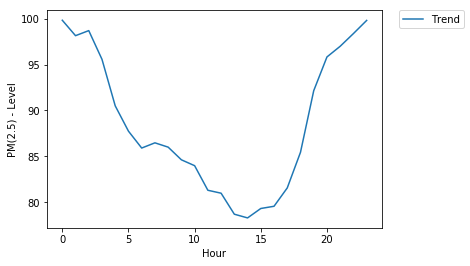

In [32]:
#For the whole data this is how the graph is for all the hours
#average of the PM values by Hour  
listofmeansbyhour = []
for i in range(0,24):
    x = Df[Df.hour == i]
    listofmeansbyhour.append(x.Average_PM_Level.mean())

#plot of Average PM values by hour with Hour
hours = []
for i in range(0,24):
    hours.append(i)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(hours,listofmeansbyhour, '-',label="Trend")
plt.xlabel('Hour')
plt.ylabel('PM(2.5) - Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



<b>The above graph clearly depicts the<b style="color:red">High, Low, High</b> trend between <b style="color:red">Hour</b> and <b style="color:red">PM2.5 Level</b></b>

<b> Make <b style="color:red">clusters</b> in the dataset based on the <b style="color:red">hours</b> to account for this trend</b>
<br></br>
<b> To Decide on how many clusters to make, run the <b style="color:red">elbow method</b> to find the steepest point.</b>

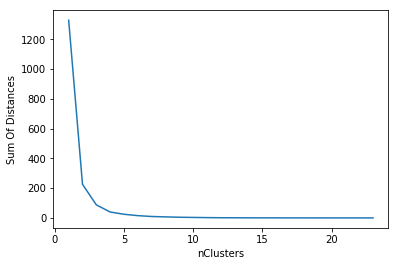

0.8040590286254883


In [33]:
s_time = time.time()

Dataframeofhoursandpm = pd.DataFrame(
    {'PM-Level': listofmeansbyhour,
     'Hour': hours,
    })
rel_cols=['PM-Level']#,'Hour']
from sklearn.cluster import KMeans

#Determining number of clusters
nClusters=range(1,24)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(Dataframeofhoursandpm[rel_cols])
    sumDistances.append(kmeans.inertia_) #Proxy for SSE
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.show()
Dataframeofhoursandpm['Cluster']=0

e_time = time.time()

print(e_time-s_time)
timedict["ElbowHour"]=e_time-s_time

<b>The above elbow curve, clearly depicts us to make <b style="color:red">3 clusters</b> on the hours</b>
<br></br>
<b>Cluster the data on <b style="color:red">one Dimension</b> i.e. hours.</b>

0.652653694152832


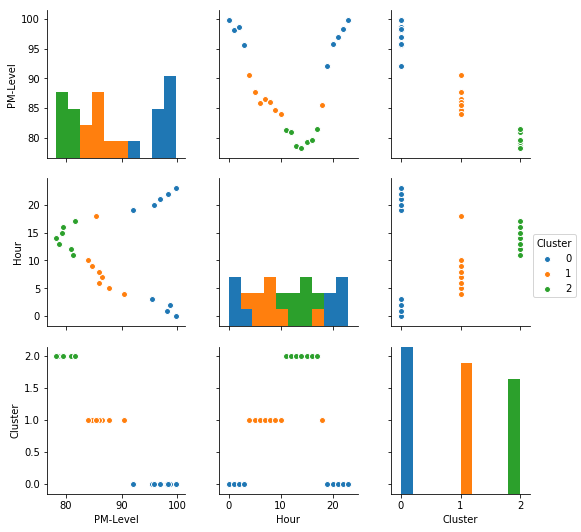

In [34]:
s_time = time.time()

kmeans=KMeans(n_clusters=3).fit(Dataframeofhoursandpm[["PM-Level"]])
Dataframeofhoursandpm['Cluster']=kmeans.labels_
g = sns.pairplot(Dataframeofhoursandpm,hue='Cluster')

e_time = time.time()

print(e_time-s_time)
timedict["ClustHour"]=e_time-s_time

<b style="color:orange">Check what all hours comes into one category, to cluster them accordingly</b>

In [35]:

print(Dataframeofhoursandpm["Cluster"])

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    1
19    0
20    0
21    0
22    0
23    0
Name: Cluster, dtype: int32


<b style="color:orange">Create, exta hour cluster column , to group the data accordingly</b>

In [36]:

def Applycluster(row):
    if(int(row["hour"])<=3):
        return 1
    elif(int(row["hour"])<=10):
        return 2
    elif(int(row["hour"])<=17):
        return 0
    elif(int(row["hour"])==18):
        return 2
    elif(int(row["hour"]<=23)):
        return 1
        

Beijingdata["Hour_Cluster"] = Df.apply(Applycluster, axis=1)


<b>Create <b style="color:red">Dummy variables</b> that would be used in regression, Now our regression will account for this pattern.</b>

In [37]:
DFDumy = Df.copy()
DFDumy[["Hour_Dummy1","Hour_Dummy2","Hour_Dummy3"]]= pd.get_dummies(Beijingdata["Hour_Cluster"])

<b>Check if the dummies are created properly.</b>

In [38]:
DFDumy.head()

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
27824  27825  2013      3    5     8       1      117.0          166.0   
27825  27826  2013      3    5     9       1      131.0          165.0   
27826  27827  2013      3    5    10       1      141.0          173.0   
27828  27829  2013      3    5    12       1      169.0          182.0   
27829  27830  2013      3    5    13       1      169.0          169.0   

       PM_Nongzhanguan  PM_US Post     ...       TEMP  cbwd   Iws  \
27824            140.0       150.0     ...        1.0    cv  0.89   
27825            152.0       163.0     ...        5.0    cv  1.78   
27826            128.0       172.0     ...        8.0    cv  2.67   
27828              3.0       181.0     ...       11.0    cv  4.45   
27829              3.0       187.0     ...       12.0    cv  5.34   

       precipitation Iprec    Merged_Date_Time  Average_PM_Level  Hour_Dummy1  \
27824            0.0   0.0 2013-03-05 08:00:00            143.25            0   
27825            0.0   0.0 2013-03-05 09:00:00            152.75            0   
27826            0.0   0.0 2013-03-05 10:00:00            153.50            0   
27828            0.0   0.0 2013-03-05 12:00:00            133.75            1   
27829            0.0   0.0 2013-03-05 13:00:00            132.00            1   

      Hour_Dummy2  Hour_Dummy3  
27824           0            1  
27825           0            1  
27826           0            1  
27828           0            0  
27829           0            0  

[5 rows x 23 columns]

<b style="color:orange"> Perform regression with the dummy variables</b>

In [39]:
s_time = time.time()

import statsmodels.formula.api as sm
result = sm.ols(formula="Average_PM_Level ~ TEMP+PRES+HUMI+Iws+Iprec+precipitation+Hour_Dummy1+Hour_Dummy2", data=DFDumy).fit()
print (result.summary())

e_time = time.time()

print(e_time-s_time)
timedict["Reg4"]=e_time-s_time

                            OLS Regression Results                            
Dep. Variable:       Average_PM_Level   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     846.4
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:03:55   Log-Likelihood:            -1.0850e+05
No. Observations:               19062   AIC:                         2.170e+05
Df Residuals:                   19053   BIC:                         2.171e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1135.0932     99.139     11.449

In [40]:
s_time = time.time()

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get y and X dataframes based on this regression:
y, X = dmatrices("Average_PM_Level ~ TEMP+PRES+HUMI+Iws+Iprec+precipitation+Hour_Dummy1+Hour_Dummy2", DFDumy, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

e_time = time.time()

print(e_time-s_time)
timedict["VIF4"]=e_time-s_time

   VIF Factor       features
0     36379.5      Intercept
1         3.6           TEMP
2         3.6           PRES
3         1.5           HUMI
4         1.1            Iws
5         1.4          Iprec
6         1.4  precipitation
7         1.7    Hour_Dummy1
8         1.3    Hour_Dummy2
0.10771298408508301


<b>From the regression it is clear that, this model has <b style="color:red">increased r(square)</b> and also VIF values of all variables are lesser than 5.</b>

<b>Accounting for the <b style="color:red">High, Low, High</b> trend between <b style="color:red">Months</b> and <b style="color:red">PM2.5 Level</b></b>

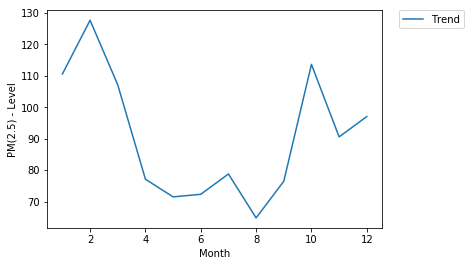

In [41]:
#Analysis of months
#For the whole data this is how the graph is for all the months
#average of the PM values by Month  
listofmeansbymonth = []
for i in range(1,13):
    x = Df[Df.month == i]
    listofmeansbymonth.append(x.Average_PM_Level.mean())
#plot of Average PM values by hour with Month
months = []
for i in range(1,13):
    months.append(i)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(months,listofmeansbymonth, '-',label="Trend")
plt.xlabel('Month')
plt.ylabel('PM(2.5) - Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


<b>The above graph clearly depicts the<b style="color:red">High, Low, High</b> trend between <b style="color:red">Month</b> and <b style="color:red">PM2.5 Level</b></b>

<b> Make <b style="color:red">clusters</b> in the dataset based on the <b style="color:red">Months</b> to account for this trend</b>
<br></br>
<b> To Decide on how many clusters to make, run the <b style="color:red">elbow method</b> to find the steepest point.</b>

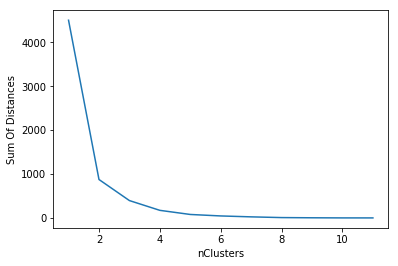

0.30193209648132324


In [42]:
s_time = time.time()
#Analysis of months
#For the whole data this is how the graph is for all the hours

Dataframeofmonthsandpm = pd.DataFrame(
    {'PM-Level': listofmeansbymonth,
     'Month': months,
    })

rel_cols=['PM-Level']
from sklearn.cluster import KMeans

#Determining number of clusters
nClusters=range(1,12)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(Dataframeofmonthsandpm[rel_cols])
    sumDistances.append(kmeans.inertia_) #Proxy for SSE
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.show()
Dataframeofmonthsandpm['Cluster']=0

e_time = time.time()
print(e_time-s_time)
timedict["ElbowMonth"]=e_time-s_time

<b>The above elbow curve, clearly depicts us to make <b style="color:red">2 clusters</b> on the Months</b>
<br></br>
<b>Cluster the data on <b style="color:red">one Dimension</b> i.e. Months.</b>

0.6739346981048584


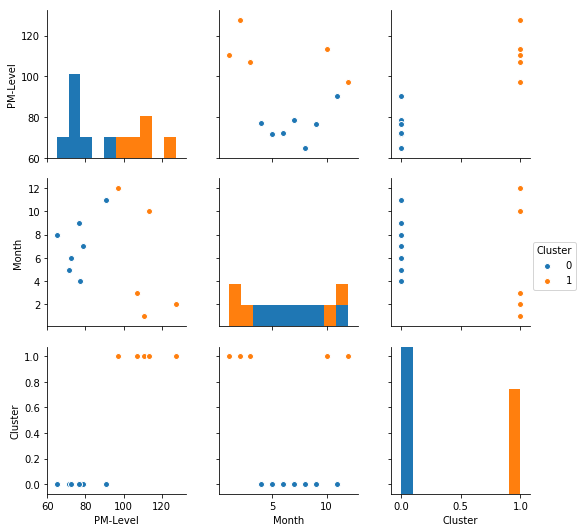

In [43]:
s_time = time.time()

kmeans=KMeans(n_clusters=2).fit(Dataframeofmonthsandpm[["PM-Level"]])
Dataframeofmonthsandpm['Cluster']=kmeans.labels_
g = sns.pairplot(Dataframeofmonthsandpm,hue='Cluster')

e_time = time.time()

print(e_time-s_time)
timedict["ClustMonth"]=e_time-s_time

<b style="color:orange">Check what all Months comes into one category, to cluster them accordingly</b>

In [44]:
Dataframeofmonthsandpm

PM-Level  Month  Cluster
0   110.575857      1        1
1   127.658882      2        1
2   107.123621      3        1
3    77.121637      4        0
4    71.503072      5        0
5    72.318882      6        0
6    78.790412      7        0
7    64.815230      8        0
8    76.463219      9        0
9   113.616259     10        1
10   90.578339     11        0
11   97.036661     12        1

<b style="color:orange">Create, exta hour cluster column , to group the data accordingly</b>

In [45]:

def ApplyclusterMonths(row):
    if(int(row["month"])<=3):
        return 0
    elif(int(row["month"])<=9):
        return 1
    elif(int(row["month"])==10):
        return 0    
    elif(int(row["month"])==11):
        return 1
    elif(int(row["month"]) == 12):
        return 0
Df["ClusterMonths"] = Df.apply(ApplyclusterMonths, axis=1)


<b>Create <b style="color:red">Dummy variables</b> that would be used in regression, Now our regression will account for this pattern.</b>

In [46]:
DFDumy[["Dummy1Month","Dummy2Month"]]= pd.get_dummies(Df["ClusterMonths"])

In [47]:
s_time = time.time()

import statsmodels.formula.api as sm
result = sm.ols(formula="Average_PM_Level ~ TEMP+PRES+HUMI+Iws+Iprec+Hour_Dummy1+Hour_Dummy2+Dummy1Month", data=DFDumy).fit()
print (result.summary())

e_time = time.time()

print(e_time-s_time)
timedict["Reg5"]=e_time-s_time

                            OLS Regression Results                            
Dep. Variable:       Average_PM_Level   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     983.0
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        12:03:58   Log-Likelihood:            -1.0811e+05
No. Observations:               19062   AIC:                         2.162e+05
Df Residuals:                   19053   BIC:                         2.163e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1328.6561     97.336     13.650      

In [48]:
s_time = time.time()

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get y and X dataframes based on this regression:
y, X = dmatrices("Average_PM_Level ~ TEMP+PRES+HUMI+Iws+Iprec+Hour_Dummy1+Hour_Dummy2+Dummy1Month", DFDumy, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

e_time = time.time()

print(e_time-s_time)
timedict["VIF5"]=e_time-s_time

   VIF Factor     features
0     36551.8    Intercept
1         4.5         TEMP
2         3.6         PRES
3         1.5         HUMI
4         1.1          Iws
5         1.0        Iprec
6         1.7  Hour_Dummy1
7         1.3  Hour_Dummy2
8         2.2  Dummy1Month
0.09242892265319824


<b>From the regression it is clear that, this model has <b style="color:red">increased r(square)</b> and also VIF values of all variables are lesser than 5.</b>

<b style="color:blue;font-size:20px">Tuning the final regression model.</b>

<b style="color:orange">Plot the Residual graph, to furthuer tune the model</b>

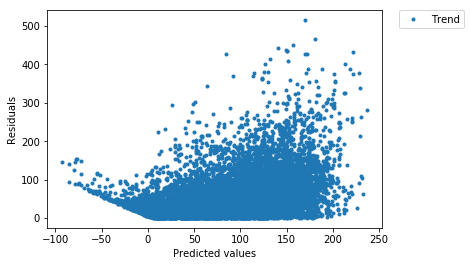

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(result.predict(),result.resid.abs(),'.',label="Trend")
plt.xlabel('Predicted values') # Adding the Axes
plt.ylabel('Residuals')# Adding the Axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<ul><li>
<b>To decrease the residual values, we will use the <b style="color:red">log</b> of the dependednt variable, to check if the <b style="color:red">r(square) value is improved</b>.</b>
</li>
<li><b>Re run the regression on <b style="color:red">np.log(Average_PM_Level)</b> </b></li>

In [50]:
s_time = time.time()

import statsmodels.formula.api as sm
result = sm.ols(formula="np.log(Average_PM_Level) ~ TEMP+PRES+HUMI+Iws+Iprec+Hour_Dummy1+Hour_Dummy2+Dummy1Month", data=DFDumy).fit()
print (result.summary())

e_time = time.time()

print(e_time-s_time)
timedict["Reg6"]=e_time-s_time

                               OLS Regression Results                               
Dep. Variable:     np.log(Average_PM_Level)   R-squared:                       0.344
Model:                                  OLS   Adj. R-squared:                  0.344
Method:                       Least Squares   F-statistic:                     1248.
Date:                      Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                              12:03:58   Log-Likelihood:                -23942.
No. Observations:                     19062   AIC:                         4.790e+04
Df Residuals:                         19053   BIC:                         4.797e+04
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [51]:
s_time = time.time()

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# get y and X dataframes based on this regression:
y, X = dmatrices("np.log(Average_PM_Level) ~ TEMP+PRES+HUMI+Iws+Iprec+Hour_Dummy1+Hour_Dummy2+Dummy1Month", DFDumy, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))


e_time = time.time()

print(e_time-s_time)
timedict["VIF6"]=e_time-s_time

   VIF Factor     features
0     36551.8    Intercept
1         4.5         TEMP
2         3.6         PRES
3         1.5         HUMI
4         1.1          Iws
5         1.0        Iprec
6         1.7  Hour_Dummy1
7         1.3  Hour_Dummy2
8         2.2  Dummy1Month
0.10815691947937012


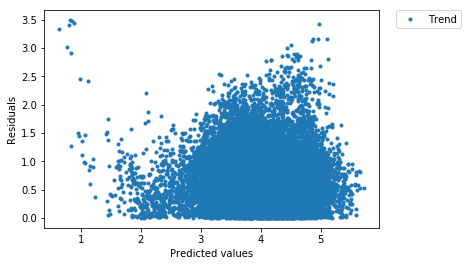

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(result.predict(),result.resid.abs(),'.',label="Trend")
plt.xlabel('Predicted values') # Adding the Axes
plt.ylabel('Residuals')# Adding the Axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<b>From the regression it is clear that, this model has <b style="color:red">increased r(square)</b>, VIF values of all variables are lesser than 5, and the residual values <b style="color:red">decreased.</b></b>

<b style="color:blue;font-size:20px">Final Regression equation:</b>

<b><b style="color:red">np.log(Average_PM_Level)</b> =20.1777 - <b style="color:red">0.122</b>(TEMP) - <b style="color:red">0.170</b>(PRES) + <b style="color:red">0.02</b>(HUMI) - <b style="color:red">0.0051</b>(Iws) - <b style="color:red">0.0487</b>(Iprec) + <b style="color:red">0.3943</b>(Hour_Dummy1) + <b style="color:red">0.2019</b>(Hour_Dummy2) + <b style="color:red">0.4462</b>(Dummy1Month)</b>

<b style="color:blue;font-size:20px">Which step took the longest?</b>

<BarContainer object of 25 artists>

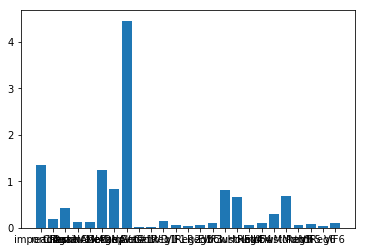

In [56]:
compare = pd.DataFrame({'var': list(timedict.keys()),'Howlong':list(timedict.values())})
plt.bar(x=list(timedict.keys()),height = list(timedict.values()))


In [57]:
compare['Howlong'].max()
longest = pd.DataFrame(compare[compare['Howlong']==compare['Howlong'].max()])

print("The step ", list(longest['var']), " took the longest time of ", float(longest['Howlong'])," seconds")

The step  ['Pairplot#1']  took the longest time of  4.4547810554504395  seconds


<b style="color:blue;font-size:25px">Code-Complexity Analysis with the varying size of the Dataset</b>

In [53]:
import time 
size = np.geomspace(start=100,stop=Beijingdata.count()[1],num=30,dtype=int)
Time = np.zeros(len(size))

for (x, n) in enumerate(size):
    times=np.zeros(50)
    for i in range(50):
        startTime = time.time()
        sm.ols(formula="np.log(Average_PM_Level) ~ TEMP+PRES+HUMI+Iws+Iprec+Hour_Dummy1+Hour_Dummy2+Dummy1Month", data=DFDumy[0:n]).fit()
        endTime = time.time()
        times[i]=endTime-startTime

    Time[x]=np.mean(times)

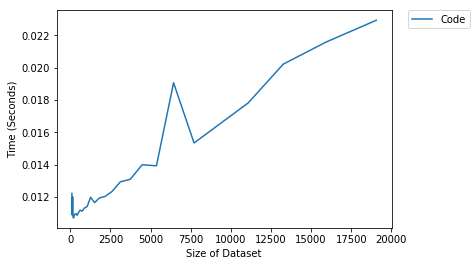

In [54]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot (size, Time, '-',label="Code")
plt.xlabel('Size of Dataset')
plt.ylabel('Time (Seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

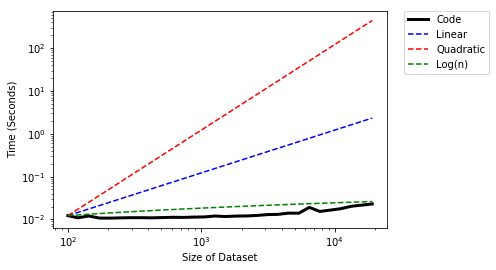

In [55]:
#Create benchmarks
linearTime = [Time[0]/size[0]*n for n in size]
quadraticTime = [(Time[0]/(size[0]**2))*(n**2) for n in size]
lognTime = [Time[0]/(np.log(size[0]))*(np.log(n)) for n in size]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog (size, Time, 'k-',linewidth=3,label="Code")

#Plot benchmarks
ax1.loglog (size, linearTime, 'b--',label="Linear")
ax1.loglog (size, quadraticTime, 'r--',label="Quadratic")
ax1.loglog (size, lognTime, 'g--',label="Log(n)")

plt.xlabel('Size of Dataset')
plt.ylabel('Time (Seconds)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<b>From the above graphs it is clear that as datasize increases the processing time to run the linear regression increases.From the graph with the benchmarks, we can easily see the the time complexity of the code follows a logarithm function.</b></b>

<b style="color:blue;font-size:20px">Prediction of PM2.5 prone areas across the globe, based on the regression equation</b>

<b>To perform this prediction, we downloaded the dataset consisting of <b style="color:red">weather, temperature, Dewpoint, Windspeed</b> and other meterological charecteristics of the cities across the globe. <b>

<ul><li><b>Read all the data from the weathers json object</b></li><br></br>
<li><b>Import folium library on to the local machine</b></li><br></br>
<li><b>If the import fails, it mean library is not installed on your local machine, please use the following code to install folium to the local machine</b></li>
<ul><li><b style="color:red">conda install -c conda-forge folium</b></li></ul></ul>

<b>Download the data from the link provided below, the file will be downloded in your downloads folder.</b>



<a>https://drive.google.com/file/d/1rt_wOrMJLEpJvDOsUeWN9FHhMDlygGRO/view?usp=sharing</a>

<b>Place the downloaded file from the download folder to your current working directory. To know what is the current working directory of the note book, please run the following code below</b>


In [58]:
import os
print(os.getcwd())


/Users/FrankLIUChangxuan/Desktop


<b>C:\Users\KVR\Documents\Python Scripts\Class examples\Project_Files</b> This represent My <b style="color:red">working directory</b>, Please run the above code to get yours.

In [59]:
import folium
from folium import plugins
import pandas as pd
WeatherDataofCities = pd.read_json("weathers.json", lines =True)


<b>Description of the dataset</b>
<ul>
<li><b style="color:red">city</b> - City Name</li>
<li><b style="color:red">lon</b> : Longitude of the city</li>
<li><b style="color:red">lat</b> : Lattitude of the city</li>
<li><b style="color:red">temp</b> : Temperature of the city</li>
<li><b style="color:red">pressure</b> : Pressure of the city</li>
<li><b style="color:red">humidity</b> : Hunidity of the city</li>
<li><b style="color:red">speed</b> : Windspeed</li>
</ul>

<b style="color:orange;font-size:10">Read all the variables from the json into the dataframe to perform prediction</b>

In [60]:
place=[]
for i in range(len(WeatherDataofCities.index)):
    place.append(WeatherDataofCities['city'][i]["name"])
lons=[]
for i in range(len(WeatherDataofCities.index)):
    lons.append(WeatherDataofCities['city'][i]["coord"]["lon"])
lats=[]
for i in range(len(WeatherDataofCities.index)):
    lats.append(WeatherDataofCities['city'][i]["coord"]["lat"])
temperature=[]
for i in range(len(WeatherDataofCities.index)):
    temperature.append(WeatherDataofCities['main'][i]["temp"]-273)
pres=[]
for i in range(len(WeatherDataofCities.index)):
    pres.append(WeatherDataofCities['main'][i]["pressure"])
humi=[]
for i in range(len(WeatherDataofCities.index)):
    humi.append(WeatherDataofCities['main'][i]["humidity"])
iws=[]
for i in range(len(WeatherDataofCities.index)):
    iws.append(WeatherDataofCities['wind'][i]["speed"])

ivs = ["place","lons","lats","temperature","pres","humi","iws"]
Weatherdataframe = pd.DataFrame([place,lons,lats,temperature,pres,humi,iws],index = ivs).T


<b style="color:orange">Define a function, that returns the predicted PM2.5 level, based on regression equation deviced above.</b>

In [61]:
def getPM(entry):
    PM = 20.6666 -0.0145*entry[3]-0.0174*entry[4]+0.02*entry[5]-0.005*entry[6]+0.39*entry[7]+0.20*entry[8]+0.38*entry[9]
    return PM

<b style="color:orange">Create a function that performs the complex operation on each row and returns PM2.5 level</b>

In [62]:
cols = ["place","lons","lats","temperature","pres","humi","iws","dummyH1","dummyH2","dummyM"]
def item(i):
    return [Weatherdataframe.loc[i,m] for m in cols]

from datetime import datetime
Weatherdataframe["dummyH1"]=[0]*len(Weatherdataframe.index)#make a note of the DUmmy based on the dummyH1 and dummyH2
Weatherdataframe["dummyH2"]=[0]*len(Weatherdataframe.index) 
Weatherdataframe["dummyM"]=[0]*len(Weatherdataframe.index)#Make a note of the month based on the value of dummyM
things = list(item(i)for i in range(len(Weatherdataframe.index)))
Weatherdataframe["PMlevel"]=list(map(getPM,things))

<b> Plot the heatmap with the PM levels based on the <b style="color:red">lattitude</b> and the <b style="color:red">longitude</b> of the city and the PM level</b>

In [63]:
import numpy as np
line = np.percentile(Weatherdataframe["PMlevel"],95)
draw = Weatherdataframe[Weatherdataframe["PMlevel"]>line]
heatmap = folium.Map(location=[0, 0], zoom_start=3)
heatmap.add_child(plugins.HeatMap([[row["lats"], row["lons"]] for PMlevel, row in draw.iterrows()]))

<b>The heatmap depicts different cities across the planet, and <b style="color:red">red</b> color depicts the regions that are <b style="color:red">highly</b> prone to PM2.5 Level, and <b style="color:red"> green</b> depicts region that are <b style="color:red">least</b> prone to PM2.5 compared to the ones in the graph.</b>

<b style="color:orange;font-size:15px">These kind of prediction heatmaps would help us to understand the PM2.5 levels on a global scale, which would 
allow us to device new laws and policies in those regions to take necessary actions against PM2.5</b>

<b style="color:blue;font-size:20px">Recommendations</b><br></br><ul>
<li><b> The regression model for our analysis showed an r-square of 34.4%. Predicting real world data with accuracy using liner models is a tough job to acheive.</b>
<br></br>
<li><b> We imporved the <b style="color:red">linear model</b> as much as we can to account for all the possible patterns in the data and remove <b style="color:red">multicollinearity</b> between variable, to acheive maximum precision on the  predict.</b>
<br></br>
<li><b>However using <b style="color:red">NON -linear modelling</b> could be stastically appropriate analysis on the Impact of weather data on PM2.5</b>
<br></br>
<li><b>We made an attempt to address this with a non - linear model, However as class dealt with only linear models,<b style="color:red"> we restricted the scope of analysis only to the linear models.</b></b></li>
</ul>

<b style="color:blue">Non-linear Modelling test on Impact of independent variables on PM2.5</b>

In [64]:
s_time = time.time()

import statsmodels.formula.api as sm
result = sm.ols(formula="np.log(Average_PM_Level) ~ TEMP+np.power(PRES,2)+np.power(HUMI,-1)+np.power(Iws,-1)+Iprec+Hour_Dummy1+Hour_Dummy2+Dummy1Month+np.power(TEMP,2)*PRES*HUMI*Iws*np.power(Iprec,-2)*Hour_Dummy1*Hour_Dummy2*Dummy1Month", data=DFDumy).fit()
print (result.summary())

e_time = time.time()

print(e_time-s_time)


<string>:1: RuntimeWarning: divide by zero encountered in power
<string>:1: RuntimeWarning: divide by zero encountered in power
/Users/FrankLIUChangxuan/anaconda3/lib/python3.6/site-packages/patsy/build.py:276: RuntimeWarning: invalid value encountered in multiply
  out[:, i] *= factor_values[factor][:, column_idx]


                               OLS Regression Results                               
Dep. Variable:     np.log(Average_PM_Level)   R-squared:                       0.577
Model:                                  OLS   Adj. R-squared:                  0.422
Method:                       Least Squares   F-statistic:                     3.721
Date:                      Sat, 21 Jul 2018   Prob (F-statistic):           2.79e-29
Time:                              12:04:29   Log-Likelihood:                -513.50
No. Observations:                       638   AIC:                             1371.
Df Residuals:                           466   BIC:                             2138.
Df Model:                               171                                         
Covariance Type:                  nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0

/Users/FrankLIUChangxuan/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/FrankLIUChangxuan/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/FrankLIUChangxuan/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/FrankLIUChangxuan/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<b>It is clear from the report, the <b style="color:red">r-square value of this model is 57.5</b>, which is higher than the r-square value of the linear model</b>
<br></br>
<b>This proves the fact that non-inear model would be the better than linear model when working with weather data.</b>